[![](https://velog.velcdn.com/images/hyejinbeck/post/c912c8e7-85ba-425a-a1ec-727f6ba99667/image.png)
![](https://velog.velcdn.com/images/hyejinbeck/post/5b0a2ad7-75f7-4d49-bd5a-752e9f0dc058/image.png)](https://www.jnilbo.com/70601990729)

# 백혜진의 "통매음" 관련 텍스트 데이터 분석 

2025년 5월 6일 11:10 수집 데이터 7500 rows (게시글 총 300 page 분량 / 2025.03.20 20:34 ~ 2025.05.06 10:42)

### 0. 프로젝트 개요 

이 프로젝트는 디시인사이드 웹사이트에서 "통매음"이라는 키워드로 검색되는 게시글을 수집 및 분석하여, <br>
해당 키워드가 실제 법적 문제와 관련된 맥락에서 사용되는 경우가 많은지, 아니면 정신연령이 낮은 이들의 단순한 장난과 같은 표현이 더 많은지 구분하는 것을 목표로 한다. <br>
이를 위해 웹사이트의 검색 결과 HTML을 파싱하여 데이터를 수집하고, 텍스트 전처리 및 형태소 분석을 거친 후, TF-IDF, 상관 분석, 군집 분석 등의 기법을 활용하여 텍스트 분석을 수행한다.

궁극적으로는 이 분석 결과를 바탕으로, <br>
"통매음" 키워드에 대해 실질적인 법률적 수요가 있는 사용자와 단순한 유희 목적의 사용자를 구분함으로써, <br>
키워드 광고 전략과 콘텐츠 마케팅의 방향성을 보다 정교화하는 데 기여하는 것이 본 프로젝트의 실질적인 목적이다.

### 1. 데이터 수집
- 디씨인사이드에서 "통매음" 키워드로 검색된 게시글 수집
   - requests와 BeautifulSoup을 이용한 스크래핑 및 HTML 파싱

### 2. 데이터 전처리
- 정규 표현식 (re)과 람다 함수를 활용한 텍스트 정제
- 날짜 데이터를 dateutil.parser로 변환하고, 요일 추출 (calendar)
- 형태소 분석기 Kiwi를 이용하여 명사만 추출 

### 3. 데이터 분석
#### 3-1. 기초 텍스트 분석
- 다빈도 단어 분석: collections.Counter().most_common()
- 단어 조합 분석 (n-gram): 의미 있는 짝궁 단어 찾기
- 특정 키워드 및 다중 키워드 등장 빈도 분석

#### 3-2. 시각화 및 주요 키워드 분석
- 단어 빈도 시각화 (막대그래프barchart)
- TF-IDF 분석을 통해 게시글별 핵심 키워드 추출
- 상관분석
    - 주요 단어 간 동시 등장 관계 시각화 (heatmap)

#### 3-3. 주제 및 군집 구조 파악
- PCA 분석: 게시글 간 텍스트 유사성 기반 차원 축소
- K-Means 군집분석: 유사한 패턴을 가진 게시글 유형 분류

---

# 1. 데이터 수집 

- 디씨인사이드에서 "통매음" 키워드로 검색된 게시글 수집
   - requests와 BeautifulSoup을 이용한 스크래핑 및 HTML 파싱

In [1]:
import requests
from bs4 import BeautifulSoup

import time 
import pandas as pd

In [2]:
url = 'https://search.dcinside.com/post/p/{}/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C'

In [3]:
for page in range(1,11): 
    print(url.format(page))

https://search.dcinside.com/post/p/1/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/2/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/3/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/4/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/5/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/6/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/7/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/8/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/9/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C
https://search.dcinside.com/post/p/10/sort/latest/q/.ED.86.B5.EB.A7.A4.EC.9D.8C


디시인사이드 게시글 제목 태그는 a.tit_txt <br>
디시인사이드 게시글 내용 태그는 a.link_dsc_txt

In [6]:
response = requests.get(url.format(1))
html = response.text
soup = BeautifulSoup(html, 'lxml')

# print(soup)

# <!DOCTYPE html>
# <html class="darkmode" lang="ko">
# <head>
# <meta charset="utf-8"/>
# <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
# <meta content="kr" name="content-language"/>
# <meta content="8_SyZg2Wg3LNnCmFXzETp7ld4yjZB8ny17m8QsYsLwk" name="google-site-verification"/>
# <meta content="디시인사이드" name="author"/>
# <meta content="디시인사이드 검색결과" name="title"/>
# <meta content="디시인사이드 검색결과" name="description"/>
# <meta content="website" property="og:type"/>
# <meta content="디시인사이드 검색결과" property="og:title"/>
# <meta content="디시인사이드 검색결과" property="og:description"/>

![](https://velog.velcdn.com/images/hyejinbeck/post/b5f8c805-f2ae-48ad-a999-678246f32948/image.png)

In [7]:
def find_titles(soup): 
    """게시물 제목을 수집"""
    title_soup = soup.select('a.tit_txt')
    titles = [title.text for title in title_soup]
    return titles

titles = find_titles(soup)
titles[:3]

['형님들 이거 통매음인가요??', 'Pb견들도 날 통매음으로 고소하겠다던데 ㅋㅋ', '결국 피의사실 통매음 스토킹인것만 인정하고 갔구나']

In [8]:
def find_content(soup): 
    """게시물 본문과 게시판&작성일을 수집"""
    content_soup = soup.select('p.link_dsc_txt')
    contents = [content.text for content in content_soup]

    contents_text = []                           # 게시물 본문만 수집 
    etc = []                                     # 그 외 나머지 (게시판명과 작성일을 수집) 
    for idx, content in enumerate(contents):     # enumerate함수로 하나씩 조건문으로 추출 (0, '첫번째값'), (1, '두번째값') 이렇게 추출됨 
        if idx % 2 == 0 :                        # 인덱스를 2로 나누어서 0이 된다면 == 짝수라면 게시물 본문에 수집 
            contents_text.append(content)        
        else:                                    # 인덱스를 2로 나누어서 0이 안된다면 == 홀수라면 그 외 나머지 (게시판명과 작성일)에 수집 
            etc.append(content) 
    return contents_text, etc                    # 이렇게 게시물본문 / 게시판&작성일로 나누어서 별개로 저장 

contents_text, etc = find_content(soup) 

print(contents_text[:6])
print(etc[:6])

['즉시탈퇴했습니다. 대화메세지는 저장해둔상태고요. 그후에 번호도 바꾸고 현재 이상태에요 변호사들도 연휴라 아직답장도없고 혹시나해서 여기에 물어봐요 이거 통매음인가요??? 아니면 마음편하게 발뻗고자도...', '4달째 송달안된다 ㅋㅋ 나도 찢재명급 법꾸라지가 됐노 ㅋㅋ - dc official App', '댓글 쓰시느라 머리 많이 쓰셨을텐데 점심은 맛있는거 시켜드세요 세리님!', '중보갤 가보니까 통매음으로 신고될만할 글들 엄청 많네', '', '랜덤앱에서 뜬금없이 상대방이 자기 몸 사진 보내고 저가 햟아주고싶네 라고 했는데 탈퇴했어요 이거 성립 되나요?..']
['통매음2025.05.06 10:42', '중도보수2025.05.06 10:25', '세리2025.05.06 09:42', '국민의힘 비대위2025.05.06 08:20', '편의점2025.05.06 07:59', '통매음2025.05.06 07:36']


In [9]:
titles = []
contents = []
etcs = []

for i in range(1, 301): 
    if i % 15 == 0:         # 15 -> 30 등 ... 15단위로만 출력되게 
        print("300p 중 현재 {}페이지".format(i)) 
    
    response = requests.get(url.format(i))
    html = response.text
    soup = BeautifulSoup(html, 'lxml')
    title = find_titles(soup)
    content, etc = find_content(soup)

    titles.extend(title) 
    contents.extend(content)
    etcs.extend(etc)

    time.sleep(1)

#################################### 실행하기까지 다소 시간 소요됩니다. 

300p 중 현재 15페이지
300p 중 현재 30페이지
300p 중 현재 45페이지
300p 중 현재 60페이지
300p 중 현재 75페이지
300p 중 현재 90페이지
300p 중 현재 105페이지
300p 중 현재 120페이지
300p 중 현재 135페이지
300p 중 현재 150페이지
300p 중 현재 165페이지
300p 중 현재 180페이지
300p 중 현재 195페이지
300p 중 현재 210페이지
300p 중 현재 225페이지
300p 중 현재 240페이지
300p 중 현재 255페이지
300p 중 현재 270페이지
300p 중 현재 285페이지
300p 중 현재 300페이지


In [10]:
df = pd.DataFrame({
    "게시물제목" : titles, 
    "내용" : contents, 
    "기타 정보" : etcs
})

df

,게시물제목,내용,기타 정보
0,형님들 이거 통매음인가요??,즉시탈퇴했습니다. 대화메세지는 저장해둔상태고요. 그후에 번호도 바꾸고 현재 이상태에...,통매음2025.05.06 10:42
1,Pb견들도 날 통매음으로 고소하겠다던데 ㅋㅋ,4달째 송달안된다 ㅋㅋ 나도 찢재명급 법꾸라지가 됐노 ㅋㅋ - dc official...,중도보수2025.05.06 10:25
2,결국 피의사실 통매음 스토킹인것만 인정하고 갔구나,댓글 쓰시느라 머리 많이 쓰셨을텐데 점심은 맛있는거 시켜드세요 세리님!,세리2025.05.06 09:42
3,한망구들 통매음 안 무섭나?,중보갤 가보니까 통매음으로 신고될만할 글들 엄청 많네,국민의힘 비대위2025.05.06 08:20
4,주콩이 통매음 고소당해서 합의금 버는거임,,편의점2025.05.06 07:59
...,...,...,...
7495,모고닉 통매음으로 고소진행중,,편의점2025.03.21 04:54
7496,통매음 신고 가능여부좀,롤 하다가 지인 롤 닉이 예원이엇거든 상대가 예원이 먹고싶다 한마디했는데 통매음 신고되나,통매음2025.03.21 02:54
7497,갤주 법적으로 걸릴사항,- 통매음 - 스토킹 처벌법 - 협박죄 이상입니다!!,세리2025.03.20 21:34
7498,야 얘는 통매음 당하겄다,ㅇㅅㅇ...,김수현2025.03.20 21:24


# 2. 데이터 전처리

- 정규 표현식 (re)과 람다 함수를 활용한 텍스트 정제
- 날짜 데이터를 dateutil.parser로 변환하고, 요일 추출 (calendar)
- 형태소 분석기 Kiwi를 이용하여 명사만 추출 

In [11]:
############# 정규 표현식으로 원하는 글자만 추출해내는 re 라이브러리
import re 

############# 날짜와 시간만 추출해내는 함수 
def find_date(text) : 
    """날짜만 찾는다"""
    pattern = r"\d+.\d+.\d+"
    result = re.search(pattern, text) 
    date = result.group()
    return date 

def find_time(text) : 
    """시간만 찾는다"""
    pattern = r"\d+:\d+"
    result = re.search(pattern, text)
    time = result.group()
    return time 

############# test 
text = "통매음2025.03.16 14:26"
print(find_date(text=text))
print(find_time(text=text))

2025.03.16
14:26


In [12]:
df['날짜'] = df['기타 정보'].apply(lambda x:find_date(x))
df['작성시간'] = df['기타 정보'].apply(lambda x:find_time(x))
df.head()

,게시물제목,내용,기타 정보,날짜,작성시간
0,형님들 이거 통매음인가요??,즉시탈퇴했습니다. 대화메세지는 저장해둔상태고요. 그후에 번호도 바꾸고 현재 이상태에...,통매음2025.05.06 10:42,2025.05.06,10:42
1,Pb견들도 날 통매음으로 고소하겠다던데 ㅋㅋ,4달째 송달안된다 ㅋㅋ 나도 찢재명급 법꾸라지가 됐노 ㅋㅋ - dc official...,중도보수2025.05.06 10:25,2025.05.06,10:25
2,결국 피의사실 통매음 스토킹인것만 인정하고 갔구나,댓글 쓰시느라 머리 많이 쓰셨을텐데 점심은 맛있는거 시켜드세요 세리님!,세리2025.05.06 09:42,2025.05.06,09:42
3,한망구들 통매음 안 무섭나?,중보갤 가보니까 통매음으로 신고될만할 글들 엄청 많네,국민의힘 비대위2025.05.06 08:20,2025.05.06,08:20
4,주콩이 통매음 고소당해서 합의금 버는거임,,편의점2025.05.06 07:59,2025.05.06,07:59


In [13]:
###################################### 문자형(str)에서 날짜형(datetime)으로 변경 
from dateutil.parser import parse

date = "2025.04.27"            # str 
dateinfo = parse(date)         # datetime 

print(dateinfo.year)
print(dateinfo.month)
print(dateinfo.day)
###################################### 요일을 나타내는 번호로 변환
import calendar 

calendar.weekday(dateinfo.year, dateinfo.month, dateinfo.day)

# 0 월요일  
# 1 화요일 
# 2 수요일
# 3 목요일
# 4 금요일
# 5 토요일
# 6 일요일
###################################### 요일만 추출하는 함수
def find_day(date): 
    """요일 정보를 반환한다"""
    try : 
        dateinfo = parse(date)

        days = ['월요일','화요일','수요일','목요일','금요일','토요일','일요일']
        day = days[calendar.weekday(dateinfo.year, dateinfo.month, dateinfo.day)]
        return day 
        
    except:                 # 이걸 해줘야 에러 발생시, 코드 실행 중지되지 않고 알수없음으로 반환해줌 
        return "알수없음" 

print(find_day(date="2025.04.27"))
print(find_day(date="2025.04.26"))

2025
4
27
일요일
토요일


In [14]:
df['요일'] = df['날짜'].apply(lambda x:find_day(x))
df['시간대'] = df['작성시간'].apply(lambda x:x.split(":")[0])
df.sample(5)

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대
1511,글쓴언냐 통매음으로 고소해,ㅋㅋㅋ 백퍼긔,남자 연예인2025.04.13 16:56,2025.04.13,16:56,일요일,16
4303,치마 갤러리에 오신 것을 환영합니다,따라 최대 30일 이하 차단 1-1. 가상인물의 경우는? 가상인물에 대한 성희롱은 ...,치마(의류)2025.03.21 14:00,2025.03.21,14:00,금요일,14
6672,갤주 법적으로 걸릴사항,- 통매음 - 스토킹 처벌법 - 협박죄 이상입니다!!,세리2025.03.20 21:34,2025.03.20,21:34,목요일,21
6312,아직도통매음걸릴까봐부랄떨림..,"응,,",편의점2025.03.21 08:16,2025.03.21,08:16,금요일,08
4914,통매음 불송치 사례들 읽어보는데 개웃기네 ㅋㅋㅋ,애미드립들 창의적이네 ㅋㅋㅋ,만화2025.03.21 07:21,2025.03.21,07:21,금요일,07


In [15]:
# 게시글 제목과 내용을 합친 새로운 컬럼 만들기
df['모든글자'] = df['게시물제목']+ " " + df['내용']

# 문자열str로 지정
df['모든글자'] = df['모든글자'].astype('str')

# 확인
df.head()

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대,모든글자
0,형님들 이거 통매음인가요??,즉시탈퇴했습니다. 대화메세지는 저장해둔상태고요. 그후에 번호도 바꾸고 현재 이상태에...,통매음2025.05.06 10:42,2025.05.06,10:42,화요일,10,형님들 이거 통매음인가요?? 즉시탈퇴했습니다. 대화메세지는 저장해둔상태고요. 그후에...
1,Pb견들도 날 통매음으로 고소하겠다던데 ㅋㅋ,4달째 송달안된다 ㅋㅋ 나도 찢재명급 법꾸라지가 됐노 ㅋㅋ - dc official...,중도보수2025.05.06 10:25,2025.05.06,10:25,화요일,10,Pb견들도 날 통매음으로 고소하겠다던데 ㅋㅋ 4달째 송달안된다 ㅋㅋ 나도 찢재명급 ...
2,결국 피의사실 통매음 스토킹인것만 인정하고 갔구나,댓글 쓰시느라 머리 많이 쓰셨을텐데 점심은 맛있는거 시켜드세요 세리님!,세리2025.05.06 09:42,2025.05.06,09:42,화요일,09,결국 피의사실 통매음 스토킹인것만 인정하고 갔구나 댓글 쓰시느라 머리 많이 쓰셨을텐...
3,한망구들 통매음 안 무섭나?,중보갤 가보니까 통매음으로 신고될만할 글들 엄청 많네,국민의힘 비대위2025.05.06 08:20,2025.05.06,08:20,화요일,08,한망구들 통매음 안 무섭나? 중보갤 가보니까 통매음으로 신고될만할 글들 엄청 많네
4,주콩이 통매음 고소당해서 합의금 버는거임,,편의점2025.05.06 07:59,2025.05.06,07:59,화요일,07,주콩이 통매음 고소당해서 합의금 버는거임


In [16]:
# 그 중에서도 한글만 추출 
df['모든글_한글'] = df['모든글자'].apply(lambda
                           x:" ".join(re.compile("[가-힣]+").findall(x)))
df.head()

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대,모든글자,모든글_한글
0,형님들 이거 통매음인가요??,즉시탈퇴했습니다. 대화메세지는 저장해둔상태고요. 그후에 번호도 바꾸고 현재 이상태에...,통매음2025.05.06 10:42,2025.05.06,10:42,화요일,10,형님들 이거 통매음인가요?? 즉시탈퇴했습니다. 대화메세지는 저장해둔상태고요. 그후에...,형님들 이거 통매음인가요 즉시탈퇴했습니다 대화메세지는 저장해둔상태고요 그후에 번호도...
1,Pb견들도 날 통매음으로 고소하겠다던데 ㅋㅋ,4달째 송달안된다 ㅋㅋ 나도 찢재명급 법꾸라지가 됐노 ㅋㅋ - dc official...,중도보수2025.05.06 10:25,2025.05.06,10:25,화요일,10,Pb견들도 날 통매음으로 고소하겠다던데 ㅋㅋ 4달째 송달안된다 ㅋㅋ 나도 찢재명급 ...,견들도 날 통매음으로 고소하겠다던데 달째 송달안된다 나도 찢재명급 법꾸라지가 됐노
2,결국 피의사실 통매음 스토킹인것만 인정하고 갔구나,댓글 쓰시느라 머리 많이 쓰셨을텐데 점심은 맛있는거 시켜드세요 세리님!,세리2025.05.06 09:42,2025.05.06,09:42,화요일,09,결국 피의사실 통매음 스토킹인것만 인정하고 갔구나 댓글 쓰시느라 머리 많이 쓰셨을텐...,결국 피의사실 통매음 스토킹인것만 인정하고 갔구나 댓글 쓰시느라 머리 많이 쓰셨을텐...
3,한망구들 통매음 안 무섭나?,중보갤 가보니까 통매음으로 신고될만할 글들 엄청 많네,국민의힘 비대위2025.05.06 08:20,2025.05.06,08:20,화요일,08,한망구들 통매음 안 무섭나? 중보갤 가보니까 통매음으로 신고될만할 글들 엄청 많네,한망구들 통매음 안 무섭나 중보갤 가보니까 통매음으로 신고될만할 글들 엄청 많네
4,주콩이 통매음 고소당해서 합의금 버는거임,,편의점2025.05.06 07:59,2025.05.06,07:59,화요일,07,주콩이 통매음 고소당해서 합의금 버는거임,주콩이 통매음 고소당해서 합의금 버는거임


In [17]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

text_sample = "게임중에 초딩이 부모욕했어요. 통매음 신고 ㄱㄱ? 구트위터 x에서 만난 사람임. X아실랑가?"
kiwi.tokenize(text_sample)

[Token(form='게임', tag='NNG', start=0, len=2),
 Token(form='중', tag='NNB', start=2, len=1),
 Token(form='에', tag='JKB', start=3, len=1),
 Token(form='초딩', tag='NNP', start=5, len=2),
 Token(form='이', tag='JKS', start=7, len=1),
 Token(form='부모', tag='NNG', start=9, len=2),
 Token(form='욕', tag='NNG', start=11, len=1),
 Token(form='하', tag='XSV', start=12, len=1),
 Token(form='었', tag='EP', start=12, len=1),
 Token(form='어요', tag='EF', start=13, len=2),
 Token(form='.', tag='SF', start=15, len=1),
 Token(form='통', tag='NNG', start=17, len=1),
 Token(form='매음', tag='NNG', start=18, len=2),
 Token(form='신고', tag='NNG', start=21, len=2),
 Token(form='ㄱㄱ', tag='SW', start=24, len=2),
 Token(form='?', tag='SF', start=26, len=1),
 Token(form='구', tag='MM', start=28, len=1),
 Token(form='트위터', tag='NNP', start=29, len=3),
 Token(form='x', tag='SL', start=33, len=1),
 Token(form='에서', tag='JKB', start=34, len=2),
 Token(form='만나', tag='VV', start=37, len=2),
 Token(form='ᆫ', tag='ETM', start=38,

In [18]:
def find_nouns(text): 
    """입력된 문장에서 명사만 추출하여 리스트로 반환"""
    tokens = kiwi.tokenize(text)  
    return [wrd.form for wrd in tokens if 'NN' in wrd.tag and len(wrd.form) > 1]
    
df['명사'] = df['모든글_한글'].apply(lambda x: find_nouns(x))
df.head(3)

,게시물제목,내용,기타 정보,날짜,작성시간,요일,시간대,모든글자,모든글_한글,명사
0,형님들 이거 통매음인가요??,즉시탈퇴했습니다. 대화메세지는 저장해둔상태고요. 그후에 번호도 바꾸고 현재 이상태에...,통매음2025.05.06 10:42,2025.05.06,10:42,화요일,10,형님들 이거 통매음인가요?? 즉시탈퇴했습니다. 대화메세지는 저장해둔상태고요. 그후에...,형님들 이거 통매음인가요 즉시탈퇴했습니다 대화메세지는 저장해둔상태고요 그후에 번호도...,"[매음, 탈퇴, 대화, 메세지, 저장, 상태, 번호, 상태, 변호사, 연휴, 답장,..."
1,Pb견들도 날 통매음으로 고소하겠다던데 ㅋㅋ,4달째 송달안된다 ㅋㅋ 나도 찢재명급 법꾸라지가 됐노 ㅋㅋ - dc official...,중도보수2025.05.06 10:25,2025.05.06,10:25,화요일,10,Pb견들도 날 통매음으로 고소하겠다던데 ㅋㅋ 4달째 송달안된다 ㅋㅋ 나도 찢재명급 ...,견들도 날 통매음으로 고소하겠다던데 달째 송달안된다 나도 찢재명급 법꾸라지가 됐노,"[매음, 고소, 송달, 찢재명급, 법꾸라지]"
2,결국 피의사실 통매음 스토킹인것만 인정하고 갔구나,댓글 쓰시느라 머리 많이 쓰셨을텐데 점심은 맛있는거 시켜드세요 세리님!,세리2025.05.06 09:42,2025.05.06,09:42,화요일,09,결국 피의사실 통매음 스토킹인것만 인정하고 갔구나 댓글 쓰시느라 머리 많이 쓰셨을텐...,결국 피의사실 통매음 스토킹인것만 인정하고 갔구나 댓글 쓰시느라 머리 많이 쓰셨을텐...,"[사실, 매음, 스토킹, 인정, 댓글, 머리, 점심, 세리]"


# 3. 데이터 분석 

#### 3-1. 기초 텍스트 분석
- 다빈도 단어 분석: collections.Counter().most_common()
- 단어 조합 분석 (n-gram): 의미 있는 짝궁 단어 찾기
- 특정 키워드 및 다중 키워드 등장 빈도 분석

#### 3-2. 시각화 및 주요 키워드 분석
- 단어 빈도 시각화 (막대그래프barchart)
- TF-IDF 분석을 통해 게시글별 핵심 키워드 추출
- 상관분석
    - 주요 단어 간 동시 등장 관계 시각화 (heatmap)

#### 3-3. 주제 및 군집 구조 파악
- PCA 분석: 게시글 간 텍스트 유사성 기반 차원 축소
- K-Means 군집분석: 유사한 패턴을 가진 게시글 유형 분류

In [20]:
all_nouns = [word for row in df['명사']for word in row]

# all_nouns

# ['매음',
#  '탈퇴',
#  '대화',
#  '메세지',
#  '저장',
#  '상태',

In [22]:
from collections import Counter

common_words = Counter(all_nouns).most_common()

# common_words

# [('매음', 8867),
#  ('고소', 2751),
#  ('신고', 1880),
#  ('사진', 1264),
#  ('가능', 789),
#  ('협박', 597),

In [23]:
keys = []
counts = []

keys , counts = zip(*common_words)
key = list(keys)
count = list(counts)

print(key[:5], count[:5])

['매음', '고소', '신고', '사진', '가능'] [8867, 2751, 1880, 1264, 789]


In [25]:
dc_count = pd.DataFrame({"단어":keys, "빈도":counts})
dc_count.head(10)

,단어,빈도
0,매음,8867
1,고소,2751
2,신고,1880
3,사진,1264
4,가능,789
5,협박,597
6,사이,545
7,처벌,503
8,경찰,475
9,갤러리,457


In [27]:
dc_count.describe()         # mean 평균 빈도수가 13.8  ----> 평균이상인 14번 등장한 단어들만 따로 모아봐야할 필요 있음

,빈도
count,5251.000000
mean,13.877928
std,140.194782
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,8867.000000


In [28]:
dc_counts = dc_count[dc_count['빈도']>=14]
dc_counts.head(40)                      

,단어,빈도
0,매음,8867
1,고소,2751
2,신고,1880
3,사진,1264
4,가능,789
5,협박,597
6,사이,545
7,처벌,503
8,경찰,475
9,갤러리,457


In [26]:
# all_nouns

# ['매음',
#  '탈퇴',
#  '대화',
#  '메세지',
#  '저장',
#  '상태',

In [32]:
# nGram으로 짝궁단어 찾기

def getGram(tokens , n) : 
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams = []
    bigrams = [tokens[i:i+n] for i in range(len(tokens)-n+1)]

    ngram_result = pd.DataFrame(data = {'nGram': bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x : " ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result

bigram = getGram(all_nouns, n=2)
bigram

,index,nGram
0,매음 고소,1432
1,매음 신고,1377
2,사이 매음,544
3,명예 훼손,437
4,매음 처벌,397
...,...,...
18656,새끼 주장,1
18657,주장 매음,1
18658,신고 감동,1
18659,감동 사진,1


In [34]:
bigram100 = bigram[bigram['nGram'] >= 100]
bigram100.head(30)

,index,nGram
0,매음 고소,1432
1,매음 신고,1377
2,사이 매음,544
3,명예 훼손,437
4,매음 처벌,397
5,개인 정보,387
6,매음 매음,376
7,매음 스토킹,373
8,고소 예정,365
9,사진 도용,365


In [35]:
# 트위터 검색하면 나오는 같이 나오는 단어 목록 

test1 = bigram[bigram['index'].str.contains('트위터')].copy()
test1['test1'] = test1['index'].str.replace('트위터'," ").str.strip()
test1['test1'].value_counts().head(30)

연락      2
인스타     2
협조      2
질문      2
라인      2
매음      2
꼬추      1
스타      1
링크      1
교주      1
노빠꾸네    1
본인      1
의도      1
내용      1
옾챗      1
고딩      1
진짜      1
번호      1
인생      1
꼬평      1
등등      1
패트리온    1
챗도      1
상대      1
어플      1
디씨      1
미짜      1
순간      1
사람      1
처벌      1
Name: test1, dtype: int64

In [36]:
# 변호사 검색하면 나오는 같이 나오는 단어 목록 

test2 = bigram[bigram['index'].str.contains('변호사')].copy()
test2['test2'] = test2['index'].str.replace('변호사'," ").str.strip()
test2['test2'].value_counts().head(20)

매음     2
고소     2
선임     2
주연     2
경찰     2
가능     2
유투브    2
내용     1
성희롱    1
관련     1
경우     1
카페     1
연휴     1
상태     1
벌금     1
초범     1
출신     1
실명     1
최소한    1
조언     1
Name: test2, dtype: int64

In [37]:
# 여러개 단어

words = [
    '성립', '수위', '정도', '특정', 
    '경찰','경찰서', '처벌',  '수사', '송치', '기소','혐의',
    '벌금','합의', '합의금', '피해자',
    '성희롱', '모욕', '명예','협박',
    '변호사','법률','선임','법무법인','변호인','소장','전관',
    '게임', '패드립' ,
    '사진', '영상', '인스타','인스타그램','댓글', '채팅', '트위터', '트윗','라인', '카톡', 'dm', '유투브','유튜브','네이버'
]

def label_product(product): 
    """제품 기반으로 문서를 분류"""
    labels = [word for word in words if word in product]
    return "-".join(labels)

In [38]:
df['모든글_한글'] = df['모든글_한글'].astype('str')
df['label'] = df['모든글_한글'].apply(lambda x : label_product(x))
# df['label'].value_counts()       # 이렇게 하면 너무 많으니까 
df['label'].value_counts()[1:21]   # 0번째 인덱스는 합계니까 제외 

사진                 415
경찰-경찰서             400
채팅                 393
처벌-협박              362
벌금                 213
송치                 193
정도-성희롱             182
특정-합의-명예-사진-트위터    181
혐의-명예-협박           181
경찰-사진              181
성희롱                 70
패드립                 51
모욕                  51
처벌                  42
성립                  41
정도                  35
경찰                  29
합의-합의금              27
댓글                  27
명예                  22
Name: label, dtype: int64

In [39]:
# 단어 빈도 시각화하기

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

############################################ 시각화 셋팅 
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
## 폰트 설정 및 마이너스 부호 설정
plt.rc('font', family='NanumSquare') #나눔 글꼴로 설정
#plt.rc('font', family='Malgun Gothic') #맑은 고딕으로 설정
plt.rc('font', family='AppleGothic') #맥
plt.rcParams['axes.unicode_minus'] = False #부호

Text(0.5, 0, '빈도')

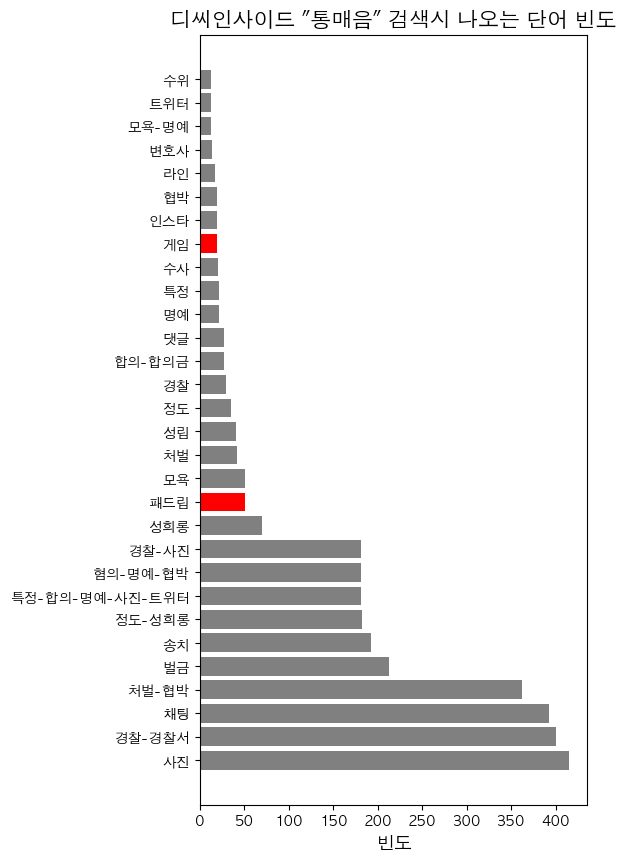

In [40]:
x = df['label'].value_counts()[1:31].index
y = df['label'].value_counts()[1:31].values

highlight_labels = ['게임', '패드립']
colors = ['red' if any(h in label for h in highlight_labels) else 'gray' for label in x]

plt.figure(figsize=(5, 10))
plt.title('디씨인사이드 "통매음" 검색시 나오는 단어 빈도', size=15)
plt.barh(x, y, color=colors)
plt.xlabel('빈도', size=13)

In [41]:
# 주요 키워드 TFIDF
# 각자 변수 값들  중에 하나만 있어도 count 
game = " ".join(df[df['모든글_한글'].str.contains('게임|패드립', na=False)]['모든글_한글'].tolist())

police = " ".join(df[df['모든글_한글'].str.contains('처벌|수사|벌금|경찰|송치|기소|혐의|재판', na=False)]['모든글_한글'].tolist())

shame = " ".join(df[df['모든글_한글'].str.contains('명예|명예훼손|협박|모욕|성희롱|능욕', na=False)]['모든글_한글'].tolist())

after = " ".join(df[df['모든글_한글'].str.contains('합의|피해자|반성', na=False)]['모든글_한글'].tolist())

how = " ".join(df[df['모든글_한글'].str.contains('인스타|사진|영상|댓글|채팅|트위터|트윗|라인|카톡|dm|유투브|유튜브|네이버', na=False)]['모든글_한글'].tolist())

standard = " ".join(df[df['모든글_한글'].str.contains('성립|수위|정도|특정', na=False)]['모든글_한글'].tolist())

lawyer = " ".join(df[df['모든글_한글'].str.contains('변호사|법률|선임|법무법인|변호인|소장|전관', na=False)]['모든글_한글'].tolist())


docs = [game, police, shame, after, how, standard, lawyer]

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer().fit(docs)
tfidf_array = tfidf.transform(docs).toarray()
tfidf_voca = tfidf.vocabulary_

df_tfidf = pd.DataFrame(
    tfidf_array, 
    columns = tfidf_voca, 
    index = [
        "게임/욕설",      # game
        "경찰/처벌",        # police
        "명예훼손/모욕/성희롱",     # shame
        "합의/피해자/반성",          # after
        "온라인 채널",             # how
        "성립/수위/정도/특정",       # standard
        "전문 변호인 조력"           # lawyer
    ]
)
df_tfidf.head(1)

,개조선,팩트,좆팔륙,기득권,한년들이,지배해서,괴롭히기,종특,유죄추정,정당방위처벌,...,변호사들을,믿어,정답이라고,생각함,다섯,뽑으며,로톡상에,존재하는,법률사무소,법무법인은
게임/욕설,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.005032,0.0,0.0,0.0,0.0


In [43]:
df_tfidf.T

,게임/욕설,경찰/처벌,명예훼손/모욕/성희롱,합의/피해자/반성,온라인 채널,성립/수위/정도/특정,전문 변호인 조력
개조선,0.000000,0.000481,0.000000,0.0,0.000000,0.000900,0.000000
팩트,0.000000,0.000481,0.000000,0.0,0.000000,0.000900,0.000000
좆팔륙,0.000000,0.000000,0.000000,0.0,0.000497,0.000900,0.000000
기득권,0.000000,0.000000,0.000000,0.0,0.000000,0.001084,0.000000
한년들이,0.000000,0.000481,0.000588,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
뽑으며,0.005032,0.000275,0.000336,0.0,0.000285,0.000515,0.010173
로톡상에,0.000000,0.000000,0.000502,0.0,0.000425,0.000000,0.015195
존재하는,0.000000,0.000579,0.000000,0.0,0.000000,0.000000,0.000000
법률사무소,0.000000,0.000000,0.000502,0.0,0.000000,0.000769,0.030390


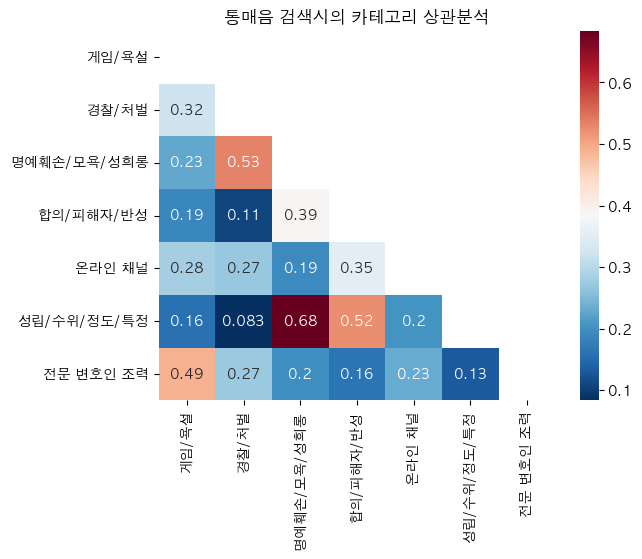

In [45]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns

cos_sim = cosine_similarity(df_tfidf)
mask = np.triu(np.ones_like(cos_sim, dtype=bool))    # 절반 가리기 

sns.heatmap(cos_sim, mask = mask , annot=True, xticklabels=df_tfidf.index, yticklabels=df_tfidf.index, cmap="RdBu_r")
plt.title("통매음 검색시의 카테고리 상관분석")
plt.show()

In [46]:
pd.DataFrame(cos_sim, index=df_tfidf.index, columns=df_tfidf.index)

,게임/욕설,경찰/처벌,명예훼손/모욕/성희롱,합의/피해자/반성,온라인 채널,성립/수위/정도/특정,전문 변호인 조력
게임/욕설,1.000000,0.321441,0.226561,0.187058,0.282471,0.159688,0.491499
경찰/처벌,0.321441,1.000000,0.531569,0.107942,0.269642,0.083268,0.272001
명예훼손/모욕/성희롱,0.226561,0.531569,1.000000,0.385970,0.193014,0.683972,0.196726
합의/피해자/반성,0.187058,0.107942,0.385970,1.000000,0.353042,0.522210,0.164155
온라인 채널,0.282471,0.269642,0.193014,0.353042,1.000000,0.204800,0.232252
성립/수위/정도/특정,0.159688,0.083268,0.683972,0.522210,0.204800,1.000000,0.132386
전문 변호인 조력,0.491499,0.272001,0.196726,0.164155,0.232252,0.132386,1.000000


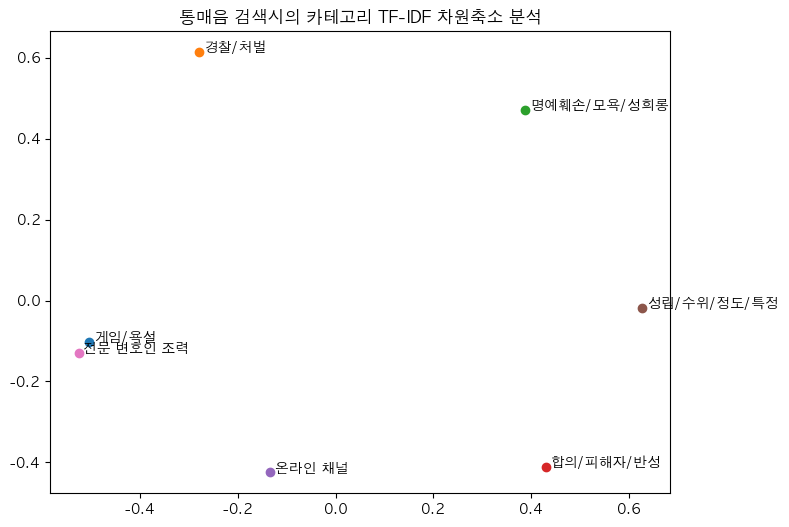

In [47]:
# 6개 카테고리별 유사성 확인 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(df_tfidf)

plt.figure(figsize=(8, 6))
for i, label in enumerate(df_tfidf.index):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=label)
    plt.text(reduced[i, 0]+0.01, reduced[i, 1], label)

plt.title("통매음 검색시의 카테고리 TF-IDF 차원축소 분석")
plt.show()

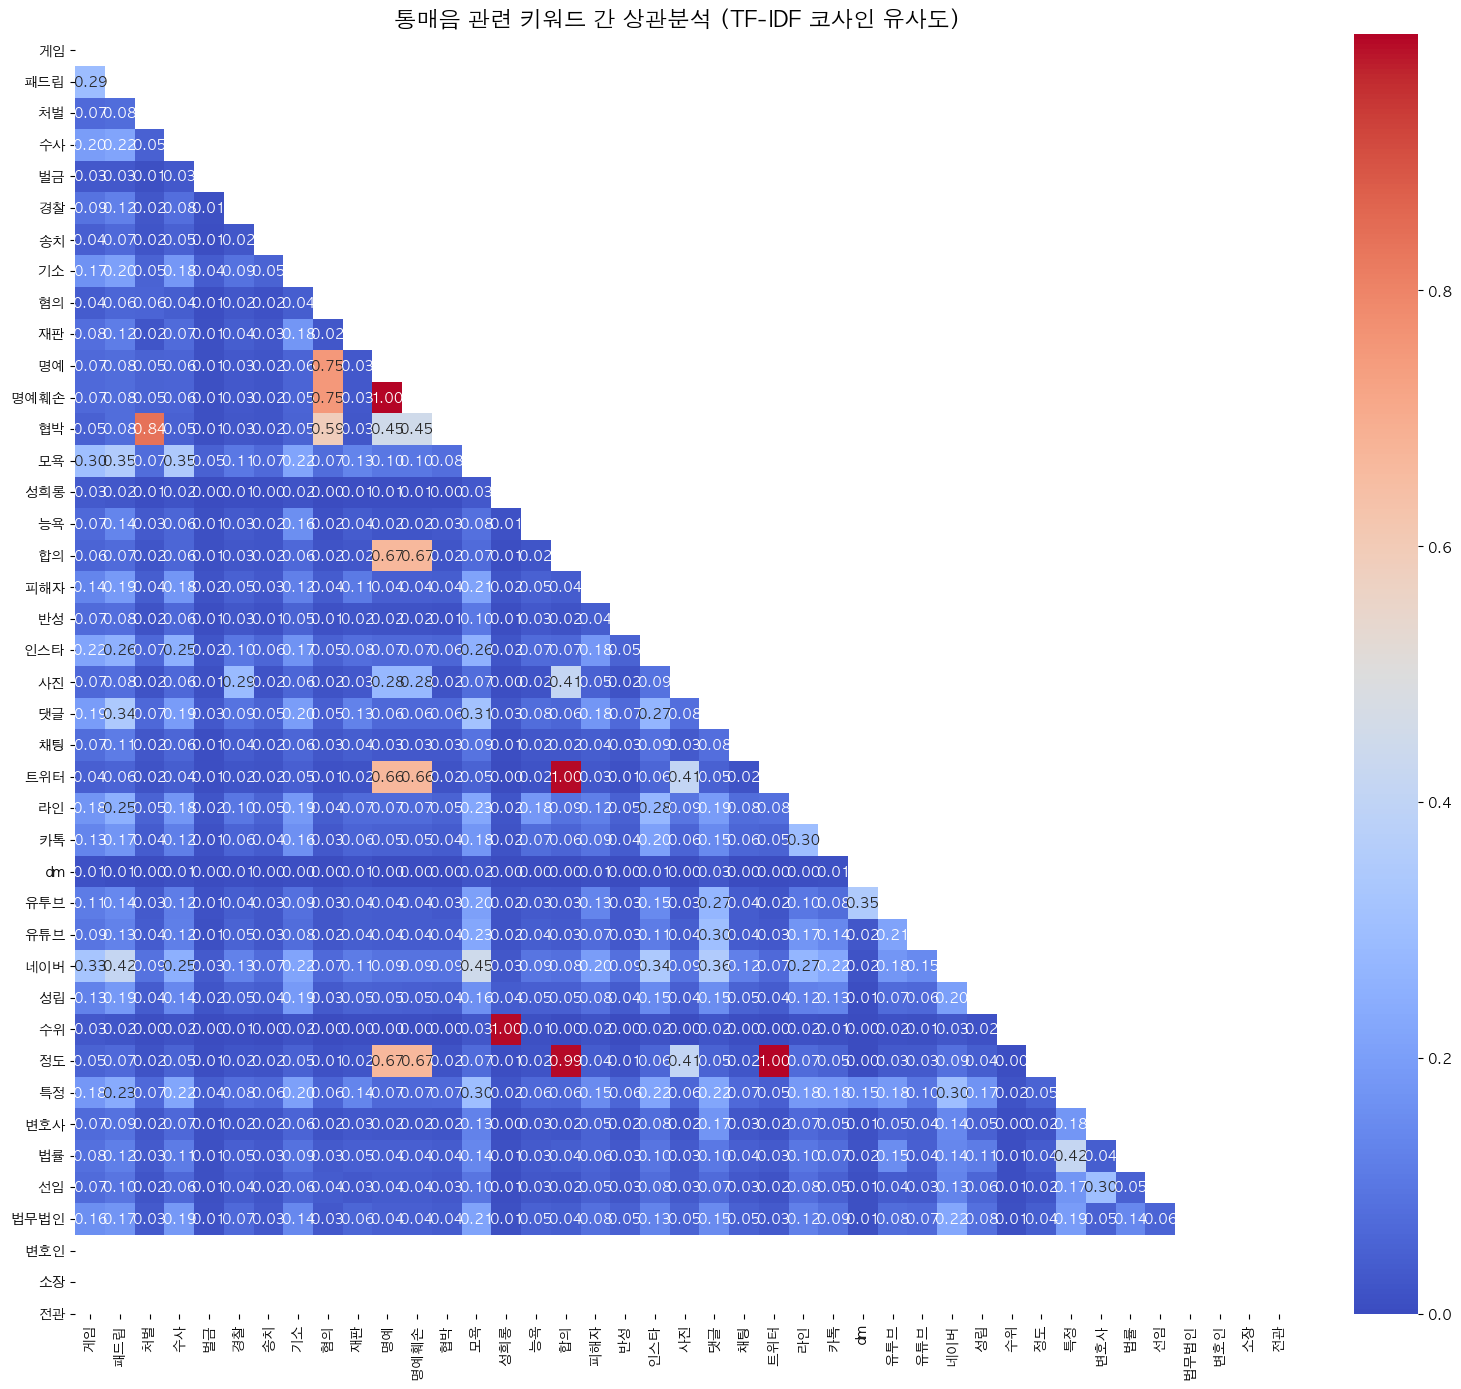

In [48]:
# 키워드 한꺼번에 넣어서 상관분석 

# 1. 키워드 목록
keywords = [
    '게임',  '패드립', 
    '처벌', '수사', '벌금', '경찰', '송치', '기소', '혐의','재판',
    '명예', '명예훼손', '협박', '모욕', '성희롱', '능욕',
    '합의', '피해자', '반성', 
    '인스타', '사진', '댓글', '채팅', '트위터', '라인','카톡','dm','유투브','유튜브','네이버',
    '성립', '수위', '정도', '특정' ,
    '변호사','법률','선임','법무법인','변호인','소장','전관',
    
]

# 2. 각 키워드별 텍스트 추출
docs_all = []
valid_keywords = []

for word in keywords:
    filtered_text = " ".join(df[df['모든글_한글'].str.contains(word, na=False)]['모든글_한글'].tolist())
    if filtered_text.strip():  # 내용이 있을 때만 추가
        docs_all.append(filtered_text)
        valid_keywords.append(word)


# 3. TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(docs_all)

# 4. 코사인 유사도
cos_sim_all = cosine_similarity(tfidf_matrix)

# 5. 상관행렬 시각화
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(cos_sim_all, dtype=bool))

sns.heatmap(cos_sim_all, mask=mask, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=keywords, yticklabels=keywords)
plt.title("통매음 관련 키워드 간 상관분석 (TF-IDF 코사인 유사도)", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [49]:
pd.DataFrame(cos_sim_all, index=valid_keywords, columns=valid_keywords).head()

,게임,패드립,처벌,수사,벌금,경찰,송치,기소,혐의,재판,...,네이버,성립,수위,정도,특정,변호사,법률,선임,법무법인,소장
게임,1.000000,0.293679,0.068542,0.196135,0.027540,0.093561,0.044492,0.167904,0.038975,0.081801,...,0.094663,0.327788,0.127526,0.030611,0.053475,0.181576,0.073397,0.083655,0.071263,0.159924
패드립,0.293679,1.000000,0.075611,0.218445,0.027967,0.123638,0.066936,0.203690,0.058796,0.116558,...,0.127729,0.416446,0.185529,0.021371,0.066987,0.234874,0.086533,0.119363,0.096357,0.174698
처벌,0.068542,0.075611,1.000000,0.048773,0.008227,0.024141,0.020201,0.054148,0.057593,0.022259,...,0.037971,0.089836,0.038807,0.004843,0.018311,0.069672,0.024403,0.032788,0.022318,0.033956
수사,0.196135,0.218445,0.048773,1.000000,0.028059,0.081989,0.048625,0.183500,0.042061,0.072712,...,0.118133,0.251191,0.141125,0.015669,0.053725,0.221578,0.065450,0.109625,0.064325,0.187469
벌금,0.027540,0.027967,0.008227,0.028059,1.000000,0.010028,0.005995,0.036231,0.006486,0.009891,...,0.010421,0.032344,0.020712,0.002115,0.006083,0.039079,0.007986,0.010986,0.008866,0.014200


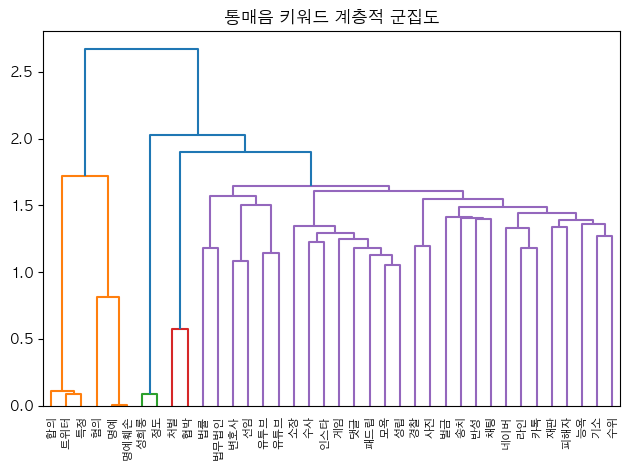

In [51]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# 계층적 군집 시각화
dendrogram = sch.dendrogram(sch.linkage(tfidf_matrix.toarray(), method='ward'), labels=valid_keywords)
plt.title("통매음 키워드 계층적 군집도")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [52]:
# 각 키워드별로 유사도가 높은 상위 키워드 5개 정도 출력하여, 키워드 흐름 파악 

top_n = 5
for i, kw in enumerate(valid_keywords):
    top_indices = np.argsort(cos_sim_all[i])[::-1][1:top_n+1]
    similar = [(valid_keywords[j], cos_sim_all[i][j]) for j in top_indices]
    print(f"'{kw}'와 유사한 키워드:")
    for sim_kw, score in similar:
        print(f"   {sim_kw}: {score:.2f}")


'게임'와 유사한 키워드:
   성립: 0.33
   모욕: 0.30
   패드립: 0.29
   인스타: 0.22
   수사: 0.20
'패드립'와 유사한 키워드:
   성립: 0.42
   모욕: 0.35
   댓글: 0.34
   게임: 0.29
   인스타: 0.26
'처벌'와 유사한 키워드:
   협박: 0.84
   성립: 0.09
   패드립: 0.08
   모욕: 0.07
   변호사: 0.07
'수사'와 유사한 키워드:
   모욕: 0.35
   인스타: 0.25
   성립: 0.25
   변호사: 0.22
   패드립: 0.22
'벌금'와 유사한 키워드:
   모욕: 0.05
   변호사: 0.04
   기소: 0.04
   성립: 0.03
   댓글: 0.03
'경찰'와 유사한 키워드:
   사진: 0.29
   성립: 0.13
   패드립: 0.12
   모욕: 0.11
   라인: 0.10
'송치'와 유사한 키워드:
   성립: 0.07
   패드립: 0.07
   모욕: 0.07
   변호사: 0.06
   인스타: 0.06
'기소'와 유사한 키워드:
   성립: 0.22
   모욕: 0.22
   변호사: 0.20
   패드립: 0.20
   댓글: 0.20
'혐의'와 유사한 키워드:
   명예훼손: 0.75
   명예: 0.75
   협박: 0.59
   모욕: 0.07
   성립: 0.07
'재판'와 유사한 키워드:
   기소: 0.18
   변호사: 0.14
   모욕: 0.13
   댓글: 0.13
   패드립: 0.12
'명예'와 유사한 키워드:
   명예훼손: 1.00
   혐의: 0.75
   합의: 0.67
   특정: 0.67
   트위터: 0.66
'명예훼손'와 유사한 키워드:
   명예: 1.00
   혐의: 0.75
   합의: 0.67
   특정: 0.67
   트위터: 0.66
'협박'와 유사한 키워드:
   처벌: 0.84
   혐의: 0.59
   명예: 0.45
   명예훼손: 0.45
   성립: 0.

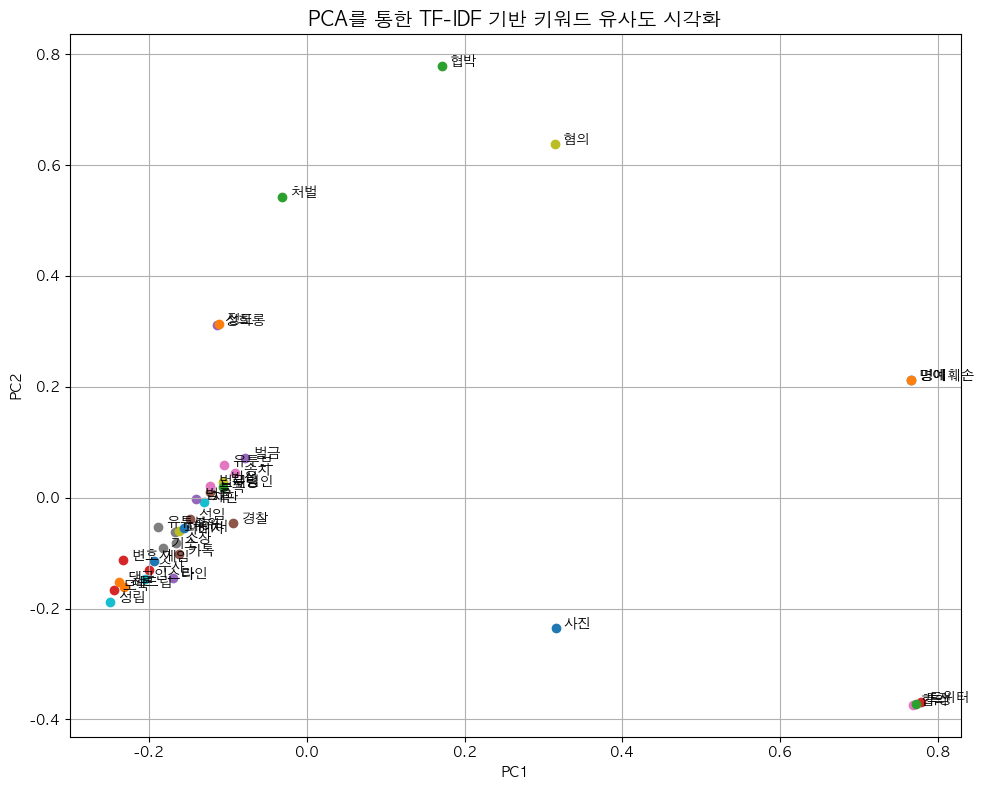

In [53]:
# 차원축소 --> 6개 카테고리별 유사성 확인 

from sklearn.decomposition import PCA

# PCA 차원 축소 (2차원)
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())  # sparse matrix → dense 배열로 변환 필요

# 산점도 시각화
plt.figure(figsize=(10, 8))
for i, label in enumerate(valid_keywords):  # valid_keywords로 사용
    plt.scatter(reduced[i, 0], reduced[i, 1], label=label)
    plt.text(reduced[i, 0] + 0.01, reduced[i, 1], label, fontsize=10)

plt.title("PCA를 통한 TF-IDF 기반 키워드 유사도 시각화", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


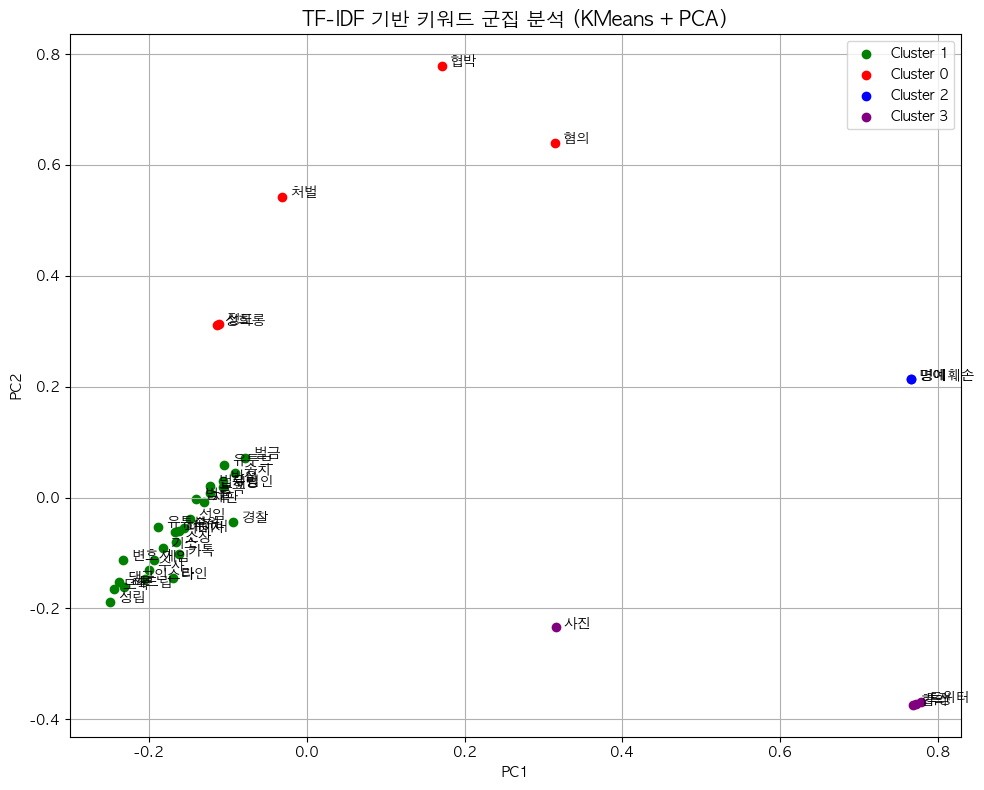

In [54]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. PCA 차원 축소 (2차원)
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())

# 2. KMeans 클러스터링 (클러스터 수는 예시로 4개 지정)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
labels = kmeans.fit_predict(reduced)

# 3. 군집 결과 시각화
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange']

for i in range(len(reduced)):
    plt.scatter(reduced[i, 0], reduced[i, 1], 
                color=colors[labels[i] % len(colors)], 
                label=f"Cluster {labels[i]}" if f"Cluster {labels[i]}" not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(reduced[i, 0] + 0.01, reduced[i, 1], valid_keywords[i], fontsize=10)

plt.title("TF-IDF 기반 키워드 군집 분석 (KMeans + PCA)", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [55]:
from sklearn.cluster import KMeans

# 결과를 DataFrame으로 정리
df_clusters = pd.DataFrame({
    '키워드': valid_keywords,
    '군집번호': labels
})

# 군집번호 기준으로 정렬 (선택사항)
df_clusters = df_clusters.sort_values(by='군집번호').reset_index(drop=True)

print(df_clusters)


     키워드  군집번호
0     처벌     0
1    성희롱     0
2     정도     0
3     협박     0
4     혐의     0
5     게임     1
6     채팅     1
7     라인     1
8     카톡     1
9    유투브     1
10   네이버     1
11    댓글     1
12    성립     1
13    수위     1
14   변호사     1
15    법률     1
16    선임     1
17   유튜브     1
18   인스타     1
19    반성     1
20    재판     1
21   패드립     1
22    수사     1
23    벌금     1
24    경찰     1
25    송치     1
26    기소     1
27  법무법인     1
28    소장     1
29    모욕     1
30    능욕     1
31   피해자     1
32  명예훼손     2
33    명예     2
34    특정     3
35   트위터     3
36    합의     3
37    사진     3


In [56]:
# 온라인 주요매채별 매주요 키워드 TFIDF
# 각자 변수 값들  중에 하나만 있어도 count 
insta = " ".join(df[df['모든글_한글'].str.contains('인스타|인스타그램|dm|insta|instagram|디엠|DM', na=False)]['모든글_한글'].tolist())

twitter = " ".join(df[df['모든글_한글'].str.contains('트윗|트위터|구트윗|twit|twitter', na=False)]['모든글_한글'].tolist())

dc = " ".join(df[df['모든글_한글'].str.contains('디씨|dc|디시|갤', na=False)]['모든글_한글'].tolist())

kakao = " ".join(df[df['모든글_한글'].str.contains('오카방|카톡', na=False)]['모든글_한글'].tolist())

docs2 = [insta, twitter, dc, kakao]

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf2 = TfidfVectorizer().fit(docs2)
tfidf_array2 = tfidf2.transform(docs2).toarray()
tfidf_voca2 = tfidf2.vocabulary_

tfidf2 = pd.DataFrame(
    tfidf_array2, 
    columns = tfidf_voca2, 
    index = [
        "인스타그램",      # game
        "트위터",        # police
        "디씨갤",     # shame
        "카카오톡",          # after
    ]
)
tfidf2.head(1)

,텔레,몸캠,이러는데,인스타,해킹당해서,이렇다,하면,상관없으려나,내사진도,아니고,...,뭐야,할래,단발성일,경우와,다발성,성희롱에,속하는가,카톡탈퇴,나간경우,특정이되서
인스타그램,0.0,0.0,0.046328,0.02435,0.0,0.0,0.0,0.088711,0.0,0.0,...,0.0,0.0,0.0,0.0,0.015443,0.0,0.015443,0.0,0.0,0.0


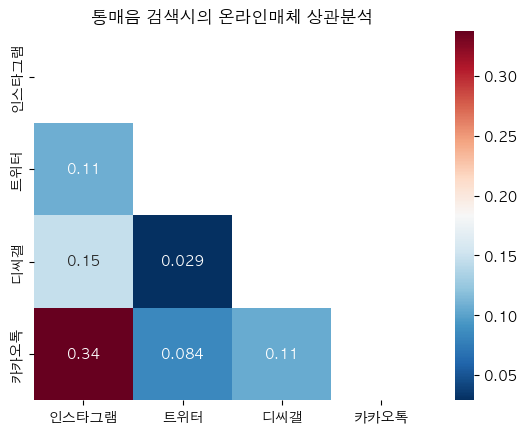

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cos_sim2 = cosine_similarity(tfidf2)
mask = np.triu(np.ones_like(cos_sim2, dtype=bool))    # 절반 가리기 

sns.heatmap(cos_sim2, mask = mask , annot=True, xticklabels=tfidf2.index, yticklabels=tfidf2.index, cmap="RdBu_r")
plt.title("통매음 검색시의 온라인매체 상관분석")
plt.show()

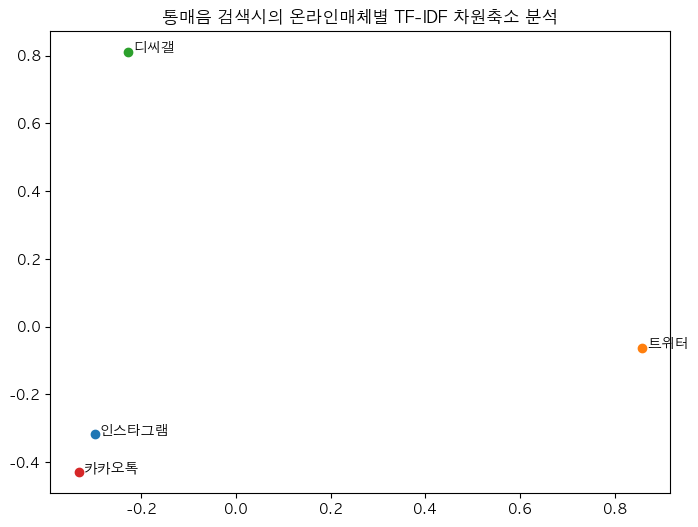

In [58]:
# 온라인채널별 유사성 확인 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf2)

plt.figure(figsize=(8, 6))
for i, label in enumerate(tfidf2.index):
    plt.scatter(reduced[i, 0], reduced[i, 1], label=label)
    plt.text(reduced[i, 0]+0.01, reduced[i, 1], label)

plt.title("통매음 검색시의 온라인매체별 TF-IDF 차원축소 분석")
plt.show()